In [1]:
import pandas as pd

csv_path = "new_flight_analysis_summary.csv"

df = pd.read_csv(csv_path)

print("✅ CSV 로드 완료")
print("행 수:", len(df))
df.head()


✅ CSV 로드 완료
행 수: 2843943


,Unnamed: 0,출발/도착,공항명,항공사,편명,도착지,일자,계획시간,예상시간,출발시간,...,도착시간,지연_분,일자_dt,출발시간_clean,departure_datetime,dep_hour,dep_weekday,is_weekend,is_delay,flight_type
0,0,출발,인천,에미레이트항공,EK323,두바이,20180201,5.0,2350.0,27.0,...,NaN,22.0,2018-02-01,27,2018-02-01 00:27:00,0,3,0,0,국제
1,1,출발,인천,대한항공,KE473,말레,20180201,5.0,2330.0,0.0,...,NaN,-5.0,2018-02-01,0,2018-02-01 00:00:00,0,3,0,0,국제
2,2,출발,인천,말레이시아항공,MH039D,쿠알라룸푸르,20180201,10.0,2030.0,2049.0,...,NaN,1239.0,2018-02-01,2049,2018-02-01 20:49:00,20,3,0,1,국제
3,3,출발,인천,에티하드,EY873,아부다비,20180201,15.0,15.0,17.0,...,NaN,2.0,2018-02-01,17,2018-02-01 00:17:00,0,3,0,0,국제
4,4,출발,인천,타이에어아시아엑스,XJ703,돈므앙(방콕),20180201,20.0,20.0,22.0,...,NaN,2.0,2018-02-01,22,2018-02-01 00:22:00,0,3,0,0,국제


In [2]:
# =====================================================
# 2️⃣ departure_datetime dtype 보장 (★ 중요)
# =====================================================
df["departure_datetime"] = pd.to_datetime(
    df["departure_datetime"],
    errors="coerce"
)

print("departure_datetime dtype:", df["departure_datetime"].dtype)
print("departure_datetime NaT 개수:", df["departure_datetime"].isna().sum())

departure_datetime dtype: datetime64[ns]
departure_datetime NaT 개수: 0


In [3]:
import pandas as pd

df_weather = pd.read_csv(
    "airport_merged_all_plus_final.csv",
    encoding="euc-kr"
)


print("✅ 날씨 CSV 로드 완료")
print("행 수:", len(df_weather))
print("컬럼 수:", df_weather.shape[1])

df_weather.head()


C:\Users\Admin\AppData\Local\Temp\ipykernel_13208\1538714707.py:3: DtypeWarning: Columns (5,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_weather = pd.read_csv(


✅ 날씨 CSV 로드 완료
행 수: 1041914
컬럼 수: 28


,지점,지점명,일시,일기현상,1층 운량(1/8),1층 운형,1층 운고(FT),기온(°C),이슬점온도(°C),해면기압(hPa),...,중하층운량(10분위),현상번호(국내식),지면온도(°C),풍속_ms,풍향_deg,시정_m,전운량_okta,1층 운고(FT)_결측여부,운형(운형약어),최저운고(100m )
0,156,광주,2023-04-30 01:00:00,없음,0.0,없음,NaN,10.1,7.1,1012.6,...,9.0,0.0,11.0,1.0,NaN,2000.0,7.0,1.0,NaN,NaN
1,156,광주,2023-04-30 02:00:00,없음,0.0,없음,NaN,9.8,6.8,1012.3,...,7.0,0.0,9.4,1.4,NaN,2000.0,6.0,1.0,NaN,NaN
2,156,광주,2023-04-30 03:00:00,없음,0.0,없음,NaN,9.2,6.8,1012.2,...,2.0,0.0,8.3,0.9,NaN,2000.0,2.0,1.0,NaN,NaN
3,156,광주,2023-04-30 04:00:00,없음,0.0,없음,NaN,8.6,6.8,1012.2,...,0.0,0.0,7.6,0.1,NaN,2000.0,0.0,1.0,NaN,NaN
4,156,광주,2023-04-30 05:00:00,없음,0.0,없음,NaN,8.5,7.4,1012.6,...,0.0,0.0,6.9,0.1,NaN,2000.0,0.0,1.0,NaN,NaN


In [4]:
# =========================
# 🔍 컬럼별 결측치 현황
# =========================

missing_summary = (
    df_weather
    .isna()
    .sum()
    .reset_index()
)

missing_summary.columns = ["column", "missing_cnt"]
missing_summary["missing_ratio"] = missing_summary["missing_cnt"] / len(df_weather)
missing_summary["dtype"] = missing_summary["column"].map(
    lambda c: df_weather[c].dtype
)

# 결측치 있는 컬럼만
missing_summary = missing_summary[missing_summary["missing_cnt"] > 0]

# 결측 비율 기준 정렬
missing_summary = missing_summary.sort_values(
    "missing_ratio", ascending=False
)

print("📊 날씨 데이터 컬럼별 결측치 현황")
display(missing_summary)


📊 날씨 데이터 컬럼별 결측치 현황


,column,missing_cnt,missing_ratio,dtype
27,최저운고(100m ),1029259,0.987854,float64
26,운형(운형약어),1029033,0.987637,object
6,1층 운고(FT),940216,0.902393,float64
4,1층 운량(1/8),720855,0.691857,float64
5,1층 운형,720855,0.691857,object
25,1층 운고(FT)_결측여부,720855,0.691857,float64
22,풍향_deg,555837,0.533477,float64
18,중하층운량(10분위),508468,0.488013,float64
20,지면온도(°C),487198,0.467599,float64
13,증기압(hPa),486371,0.466805,float64


In [5]:
df_weather.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041914 entries, 0 to 1041913
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   지점              1041914 non-null  int64  
 1   지점명             1041914 non-null  object 
 2   일시              1041914 non-null  object 
 3   일기현상            1018970 non-null  object 
 4   1층 운량(1/8)      321059 non-null   float64
 5   1층 운형           321059 non-null   object 
 6   1층 운고(FT)       101698 non-null   float64
 7   기온(°C)          1041645 non-null  float64
 8   이슬점온도(°C)       1041614 non-null  float64
 9   해면기압(hPa)       1041611 non-null  float64
 10  현지기압(hPa)       1041633 non-null  float64
 11  강수량(mm)         1041914 non-null  float64
 12  습도(%)           555556 non-null   float64
 13  증기압(hPa)        555543 non-null   float64
 14  일조(hr)          1041914 non-null  float64
 15  일사(MJ/m2)       1041914 non-null  float64
 16  적설(cm)          1041914 non-null  fl

In [6]:
missing_rate = (
    df_weather.isna().mean()
    .sort_values(ascending=False)
    .reset_index()
)
missing_rate.columns = ["column", "missing_rate"]

missing_rate


,column,missing_rate
0,최저운고(100m ),0.987854
1,운형(운형약어),0.987637
2,1층 운고(FT),0.902393
3,1층 운고(FT)_결측여부,0.691857
4,1층 운량(1/8),0.691857
5,1층 운형,0.691857
6,풍향_deg,0.533477
7,중하층운량(10분위),0.488013
8,지면온도(°C),0.467599
9,증기압(hPa),0.466805


In [7]:
numeric_cols = df_weather.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("📊 수치형 컬럼 개수:", len(numeric_cols))
numeric_cols


📊 수치형 컬럼 개수: 23


['지점',
 '1층 운량(1/8)',
 '1층 운고(FT)',
 '기온(°C)',
 '이슬점온도(°C)',
 '해면기압(hPa)',
 '현지기압(hPa)',
 '강수량(mm)',
 '습도(%)',
 '증기압(hPa)',
 '일조(hr)',
 '일사(MJ/m2)',
 '적설(cm)',
 '3시간신적설(cm)',
 '중하층운량(10분위)',
 '현상번호(국내식)',
 '지면온도(°C)',
 '풍속_ms',
 '풍향_deg',
 '시정_m',
 '전운량_okta',
 '1층 운고(FT)_결측여부',
 '최저운고(100m )']

In [8]:
object_cols = df_weather.select_dtypes(include="object").columns.tolist()

object_cols

['지점명', '일시', '일기현상', '1층 운형', '운형(운형약어)']

In [9]:
# 랜덤 샘플 100개 추출
df_weather_sample = df_weather.sample(n=100, random_state=42)

# 엑셀 저장
sample_path = "airport_final_sample_100.xlsx"
df_weather_sample.to_excel(sample_path, index=False)

print(f"✅ 샘플 100개 엑셀 저장 완료: {sample_path}")


✅ 샘플 100개 엑셀 저장 완료: airport_final_sample_100.xlsx


In [10]:
station_list = (
    df_weather["지점명"]
    .dropna()
    .sort_values()
    .unique()
)

print("✅ 지점명 개수:", len(station_list))
station_list


✅ 지점명 개수: 15


array(['광주', '군산', '김포공항', '김해시', '대구', '무안공항', '양양공항', '여수공항', '울산공항',
       '원주', '인천공항', '제주공항', '진주', '청주', '포항'], dtype=object)

In [11]:
# 출발지 목록 추출
boarding_list = (
    df["출발지"]
    .dropna()
    .sort_values()
    .unique()
)

print("✅ BOARDING_KOR 개수:", len(boarding_list))
boarding_list


✅ BOARDING_KOR 개수: 15


array(['광주', '군산', '김포', '김해', '대구', '무안', '사천', '양양', '여수', '울산', '원주',
       '인천', '제주', '청주', '포항경주'], dtype=object)

In [12]:
# =====================================================
# 3️⃣ weather 지점명 → 출발지 매핑
# =====================================================
weather_to_departure_map = {
    "광주": "광주",
    "대구": "대구",
    "군산": "군산",
    "김포공항": "김포",
    "김해시": "김해",
    "무안공항": "무안",
    "양양공항": "양양",
    "여수공항": "여수",
    "울산공항": "울산",
    "원주": "원주",
    "인천공항": "인천",
    "제주공항": "제주",
    "청주": "청주",
    "포항": "포항경주",
    "진주": "사천"
}


In [13]:
# ✅ 지점명 → 출발지 생성 (핵심)
df_weather["출발지"] = df_weather["지점명"].map(weather_to_departure_map)

print("\n날씨 출발지 유니크:")
print(sorted(df_weather["출발지"].dropna().unique()))



날씨 출발지 유니크:
['광주', '군산', '김포', '김해', '대구', '무안', '사천', '양양', '여수', '울산', '원주', '인천', '제주', '청주', '포항경주']


In [14]:
# =====================================================
# 4️⃣ weather_datetime 생성
# =====================================================
df_weather["weather_datetime"] = pd.to_datetime(
    df_weather["일시"],
    errors="coerce"
)

In [15]:
# =====================================================
# 1️⃣ 정렬 (필수)
# =====================================================
df = df.sort_values("departure_datetime")
df_weather = df_weather.sort_values("weather_datetime")

# =====================================================
# 6️⃣ merge_asof (출발지 + 시간 기준)
# =====================================================

df_merged = pd.merge_asof(
    df,
    df_weather,
    left_on="departure_datetime",
    right_on="weather_datetime",
    left_by="출발지",
    right_by="출발지",
    direction="backward"
)


In [16]:
# =====================================================
# 7️⃣ 머지 결과 검증
# =====================================================
print("\n📊 머지 결과 요약")
print("전체 flight 행 수:", len(df_merged))
print("날씨 붙은 행 수:", df_merged["weather_datetime"].notna().sum())
print("날씨 미부착 행 수:", df_merged["weather_datetime"].isna().sum())
print("날씨 부착 비율:", df_merged["weather_datetime"].notna().mean())

print("\n출발지별 날씨 부착률")
print(
    df_merged
    .groupby("출발지")["weather_datetime"]
    .apply(lambda x: x.notna().mean())
    .sort_values()
)


📊 머지 결과 요약
전체 flight 행 수: 2843943
날씨 붙은 행 수: 2843934
날씨 미부착 행 수: 9
날씨 부착 비율: 0.999996835379612

출발지별 날씨 부착률
출발지
인천      0.999991
광주      1.000000
군산      1.000000
김포      1.000000
김해      1.000000
대구      1.000000
무안      1.000000
사천      1.000000
양양      1.000000
여수      1.000000
울산      1.000000
원주      1.000000
제주      1.000000
청주      1.000000
포항경주    1.000000
Name: weather_datetime, dtype: float64


In [17]:
# =====================================================
# ❌ 날씨 미부착 행 제거
# =====================================================
before_cnt = len(df_merged)

df_merged = df_merged[df_merged["weather_datetime"].notna()].copy()

after_cnt = len(df_merged)

print(f"🧹 날씨 미부착 행 제거 완료")
print(f"제거 전 행 수: {before_cnt}")
print(f"제거 후 행 수: {after_cnt}")
print(f"제거된 행 수: {before_cnt - after_cnt}")


🧹 날씨 미부착 행 제거 완료
제거 전 행 수: 2843943
제거 후 행 수: 2843934
제거된 행 수: 9


In [18]:
# =====================================================
# 8️⃣ 최종 CSV 저장
# =====================================================
save_path = "new_flight_weather_merged.csv"

df_merged.to_csv(
    save_path,
    index=False,
    encoding="utf-8-sig"
)

print(f"\n✅ CSV 저장 완료: {save_path}")


✅ CSV 저장 완료: new_flight_weather_merged.csv


In [19]:
# ===============================
# ✅ 한글 폰트 깨짐 방지 설정
# ===============================
import matplotlib.pyplot as plt
import platform
import matplotlib.font_manager as fm

system = platform.system()

if system == "Windows":
    # Windows (대부분 Malgun Gothic 사용)
    plt.rcParams["font.family"] = "Malgun Gothic"

elif system == "Darwin":
    # macOS
    plt.rcParams["font.family"] = "AppleGothic"

else:
    # Linux (Colab / 서버)
    # 나눔고딕이 없을 경우 대비
    try:
        plt.rcParams["font.family"] = "NanumGothic"
    except:
        plt.rcParams["font.family"] = "DejaVu Sans"

# 마이너스 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

print(f"✅ 한글 폰트 설정 완료 ({system})")


✅ 한글 폰트 설정 완료 (Windows)



📌 [표] 기본 요약


,metric,value
0,rows,2843934
1,cols,53
2,departure_datetime_min,2018-01-01 02:03:00
3,departure_datetime_max,2025-12-31 23:58:00
4,unique_출발지,15
5,unique_도착지,351
6,unique_AIRPORT(있으면),None
7,unique_BOARDING_KOR(있으면),None
8,unique_ARRIVED_KOR(있으면),None



📌 [표] 상태(라벨) 분포


,status,count,ratio
0,정상운항,2360824,0.830126
1,지연,481449,0.169290
2,회항,859,0.000302
3,취소,579,0.000204
4,NaN,223,0.000078



📌 [표] 결측치 비율 TOP 30


,column,missing_rate
0,도착시간,1.000000e+00
1,최저운고(100m ),9.941634e-01
2,운형(운형약어),9.938617e-01
3,지연원인,8.409495e-01
4,중하층운량(10분위),8.070170e-01
5,지면온도(°C),7.953982e-01
6,증기압(hPa),7.944038e-01
7,습도(%),7.943919e-01
8,1층 운고(FT),7.563737e-01
9,1층 운량(1/8),6.194637e-01


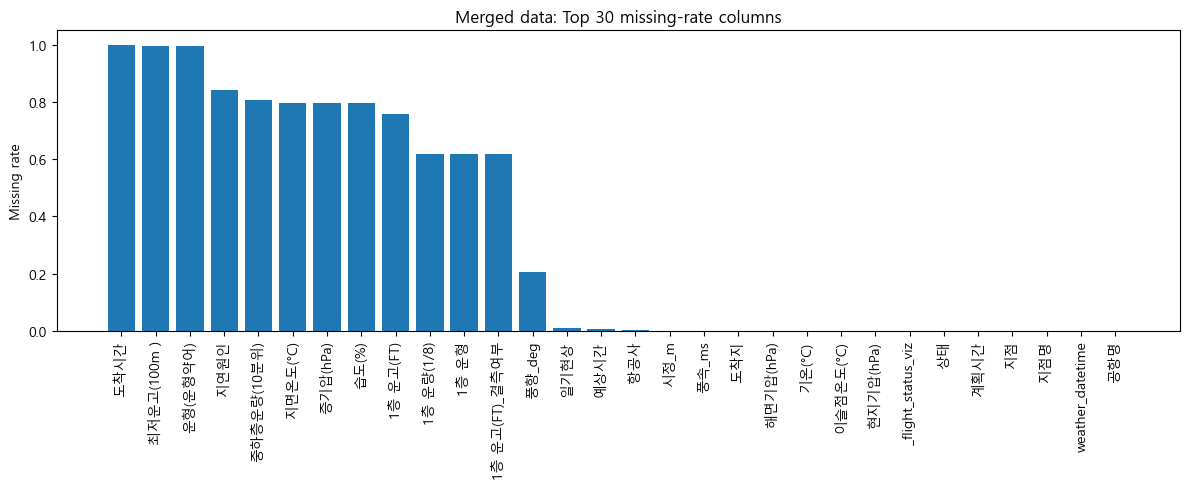

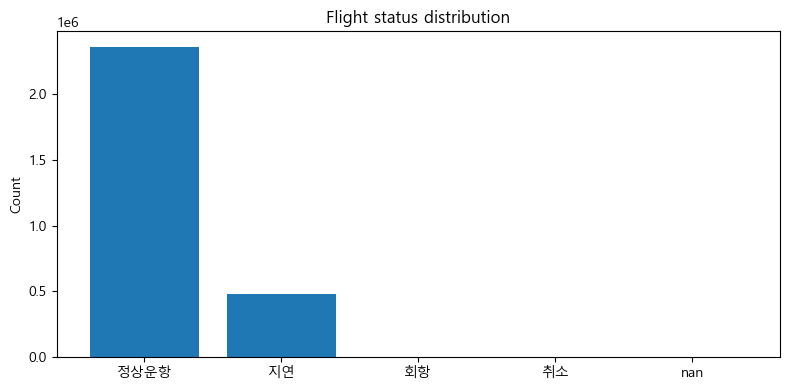


📌 [표] 월별 항공편 수 & 지연(유사) 비율 (최근 12개월)


,month,flights,delay_like_rate
84,2025-01,35694,0.307251
85,2025-02,31370,0.281925
86,2025-03,34204,0.195650
87,2025-04,34188,0.226688
88,2025-05,35800,0.214106
89,2025-06,35135,0.247218
90,2025-07,37357,0.271837
91,2025-08,38081,0.284972
92,2025-09,35868,0.264749
93,2025-10,38301,0.253675


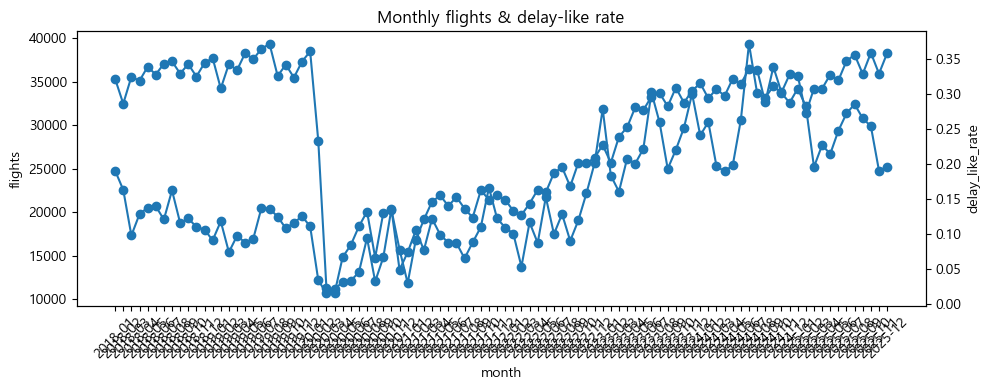


✅ 상태별 비교에 사용할 후보 수치형 컬럼(최대 6개):
['기온(°C)', '풍속_ms', '습도(%)', '풍향_deg', '강수량(mm)', '시정_m']

📌 [표] 상태별 주요 수치 변수 평균(선택된 컬럼)


,기온(°C),풍속_ms,습도(%),풍향_deg,강수량(mm),시정_m
_flight_status_viz,,,,,,
정상운항,15.278,3.372,61.598,204.239,0.107,7639.147
지연,15.908,3.842,64.019,203.169,0.259,8065.619
취소,10.522,4.414,70.320,219.850,0.922,6222.451
회항,15.461,4.177,66.308,203.416,0.313,7598.834


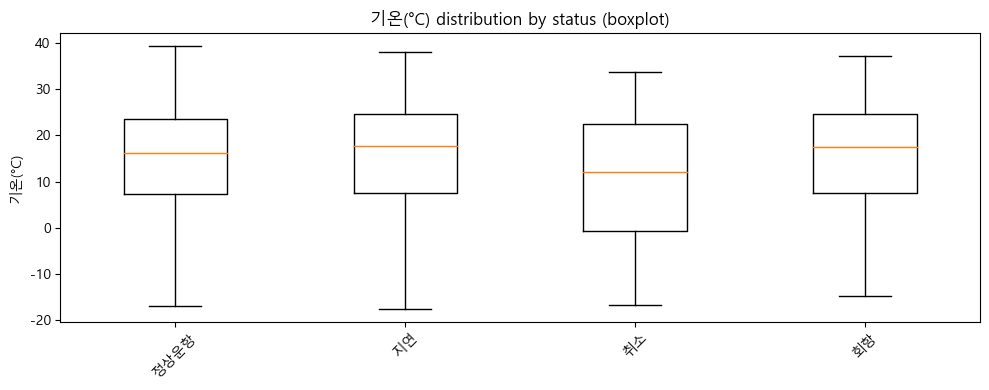


📌 [표] df_merged 샘플 5행


,Unnamed: 0,출발/도착,공항명,항공사,편명,도착지,일자,계획시간,예상시간,출발시간,...,지면온도(°C),풍속_ms,풍향_deg,시정_m,전운량_okta,1층 운고(FT)_결측여부,운형(운형약어),최저운고(100m ),weather_datetime,_flight_status_viz
9,5729493,출발,인천,비엣젯항공,VJ839,깜라인(나트랑),20180101,150.0,150.0,203.0,...,NaN,0.514444,350.0,10000.0,0.0,NaN,NaN,NaN,2018-01-01 02:00:00,정상운항
10,5729494,출발,인천,팔익스프레스,2P2483,NaN,20180101,230.0,230.0,241.0,...,NaN,0.514444,350.0,10000.0,0.0,NaN,NaN,NaN,2018-01-01 02:00:00,정상운항
11,5729495,출발,인천,세부퍼시픽항공,5J187,마닐라,20180101,230.0,230.0,250.0,...,NaN,0.514444,350.0,10000.0,0.0,NaN,NaN,NaN,2018-01-01 02:00:00,정상운항
12,5729496,출발,인천,홍콩익스프레스,UO615,홍콩,20180101,455.0,455.0,517.0,...,NaN,0.514444,190.0,10000.0,0.0,NaN,NaN,NaN,2018-01-01 05:00:00,정상운항
13,1966548,출발,김포,아시아나항공,OZ8901,제주,20180101,605.0,605.0,613.0,...,NaN,1.028888,340.0,10000.0,0.0,NaN,NaN,NaN,2018-01-01 06:00:00,정상운항


In [20]:
# =====================================================
# 9️⃣ (시각화) 머지된 데이터 품질/분포 빠르게 점검
# -----------------------------------------------------
# ✅ 이 셀은 "기존 코드"를 건드리지 않고, 맨 아래에 '추가'된 시각화 전용 셀입니다.
#
# 목표:
# 1) 표(Table)로: 기본 요약, 결측치 TOP, 상태(라벨) 분포, 상태별 날씨 평균을 확인
# 2) 그래프(Plot)로: 결측치 TOP 바차트, 상태 분포 바차트, 월별 항공편 수/지연률,
#    상태별 주요 날씨 변수 분포(Boxplot)를 한 번에 점검
#
# ⚠️ 주의:
# - 컬럼명이 파일마다 조금씩 다를 수 있어서, "자동 추정" 로직을 넣어두었습니다.
# - 아래 코드가 "상태/라벨 컬럼"을 못 찾으면, 그 부분의 시각화는 스킵하고 안내 메시지를 출력합니다.
# =====================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# (노트북 환경에서 표 출력용) display가 없을 수도 있으니 안전하게 가져옵니다.
try:
    from IPython.display import display
except Exception:
    display = print

# -----------------------------------------------------
# A) df_merged가 메모리에 없으면, 저장한 CSV를 다시 로드
# -----------------------------------------------------
# 기존 셀에서 df_merged를 만들고 save_path에 저장했습니다.
# 하지만 "커널 재시작" 후 이 셀만 실행하면 df_merged가 없을 수 있어서,
# 그 경우 save_path에서 다시 읽도록 해줍니다.
if "df_merged" not in globals():
    try:
        # save_path 변수가 위 셀에서 정의되어 있다고 가정합니다.
        df_merged = pd.read_csv(save_path, encoding="utf-8-sig")
        print(f"✅ df_merged 재로딩 완료: {save_path}")
    except Exception as e:
        raise RuntimeError(
            "df_merged가 메모리에 없고, save_path CSV 재로딩도 실패했습니다.\n"
            "👉 위 셀에서 save_path(저장 경로)와 저장 성공 로그를 먼저 확인하세요."
        ) from e

# 날짜 컬럼은 그래프(월별 지연률)에서 많이 쓰므로, 있으면 datetime으로 보정합니다.
if "departure_datetime" in df_merged.columns:
    df_merged["departure_datetime"] = pd.to_datetime(df_merged["departure_datetime"], errors="coerce")

# -----------------------------------------------------
# B) 기본 요약 표 (행/열 수, 날짜 범위, 공항/출발지 유니크 수 등)
# -----------------------------------------------------
def safe_nunique(df, col):
    """컬럼이 없으면 None을 반환하는 유틸 함수"""
    return int(df[col].nunique()) if col in df.columns else None

def safe_minmax_datetime(df, col):
    """datetime 컬럼 min/max를 안전하게 뽑는 유틸 함수"""
    if col not in df.columns:
        return (None, None)
    dt = pd.to_datetime(df[col], errors="coerce")
    return (dt.min(), dt.max())

dt_min, dt_max = safe_minmax_datetime(df_merged, "departure_datetime")

basic_summary = pd.DataFrame({
    "metric": [
        "rows",
        "cols",
        "departure_datetime_min",
        "departure_datetime_max",
        "unique_출발지",
        "unique_도착지",
        "unique_AIRPORT(있으면)",
        "unique_BOARDING_KOR(있으면)",
        "unique_ARRIVED_KOR(있으면)",
    ],
    "value": [
        len(df_merged),
        df_merged.shape[1],
        dt_min,
        dt_max,
        safe_nunique(df_merged, "출발지"),
        safe_nunique(df_merged, "도착지"),
        safe_nunique(df_merged, "AIRPORT"),
        safe_nunique(df_merged, "BOARDING_KOR"),
        safe_nunique(df_merged, "ARRIVED_KOR"),
    ]
})

print("\n📌 [표] 기본 요약")
display(basic_summary)

# -----------------------------------------------------
# C) 상태(라벨) 컬럼 자동 추정 + 없으면 RMK_KOR로 생성
# -----------------------------------------------------
def infer_status_series(df: pd.DataFrame):
    """
    상태/라벨 컬럼을 최대한 자동으로 찾아서 Series로 반환합니다.

    우선순위:
      1) 흔한 상태 컬럼들: status/상태/label/target 등
      2) 없으면 RMK_KOR(비고 텍스트)에서 지연/결항/회항 키워드로 상태 생성

    반환:
      - pandas.Series (name='flight_status') 또는 None
    """
    # 1) 명시적 상태 컬럼 후보들 (프로젝트마다 이름이 조금씩 다를 수 있음)
    candidates = [
        "flight_status", "status", "STATUS", "상태",
        "label", "LABEL", "target", "TARGET",
        "delay_type", "DELAY_TYPE"
    ]
    for col in candidates:
        if col in df.columns:
            s = df[col].copy()
            # 문자열로 통일 (그래프/집계 안정성)
            return s.astype(str).replace({"nan": np.nan}).rename("flight_status")

    # 2) 비고 텍스트(RMK_KOR)가 있으면 그걸로 상태 생성
    if "RMK_KOR" in df.columns:
        rmk = df["RMK_KOR"].astype(str).fillna("")
        # 텍스트에 특정 키워드가 포함되면 해당 상태로 분류
        status = np.where(rmk.str.contains("결항"), "취소",
                  np.where(rmk.str.contains("회항"), "회항",
                  np.where(rmk.str.contains("지연"), "지연", "문제없음")))
        return pd.Series(status, index=df.index, name="flight_status")

    # 3) 그 외는 못 찾음
    return None

status_series = infer_status_series(df_merged)

if status_series is not None:
    # 시각화/집계용 임시 컬럼으로 붙여둡니다. (기존 원본 컬럼에는 영향 없음)
    df_merged["_flight_status_viz"] = status_series
    status_counts = (
        df_merged["_flight_status_viz"]
        .value_counts(dropna=False)
        .rename_axis("status")
        .reset_index(name="count")
    )
    status_counts["ratio"] = status_counts["count"] / len(df_merged)

    print("\n📌 [표] 상태(라벨) 분포")
    display(status_counts)
else:
    print("\n⚠️ 상태/라벨 컬럼을 찾지 못했습니다.")
    print("👉 가능한 컬럼 예: flight_status, status, 상태, label, target, RMK_KOR")
    print("👉 위 중 하나가 있는지 df_merged.columns를 확인해 주세요.")

# -----------------------------------------------------
# D) 결측치 TOP 표 + 바차트
# -----------------------------------------------------
# 머지 후 결측치가 어디에 몰려있는지 확인하는 게 중요합니다.
missing_rate = (
    df_merged.isna().mean()
    .sort_values(ascending=False)
)

missing_top = missing_rate.head(30).reset_index()
missing_top.columns = ["column", "missing_rate"]

print("\n📌 [표] 결측치 비율 TOP 30")
display(missing_top)

# 그래프: 결측치 TOP 바차트
plt.figure(figsize=(12, 5))
plt.bar(missing_top["column"].astype(str), missing_top["missing_rate"])
plt.xticks(rotation=90)
plt.title("Merged data: Top 30 missing-rate columns")
plt.ylabel("Missing rate")
plt.tight_layout()
plt.show()

# -----------------------------------------------------
# E) 상태 분포 바차트 (상태를 찾았을 때만)
# -----------------------------------------------------
if status_series is not None:
    plt.figure(figsize=(8, 4))
    plt.bar(status_counts["status"].astype(str), status_counts["count"])
    plt.title("Flight status distribution")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# -----------------------------------------------------
# F) 월별 항공편 수 & 지연(유사) 비율 추이 (가능할 때만)
# -----------------------------------------------------
# - departure_datetime 이 있어야 하고
# - 상태(라벨)도 있어야 합니다.
if ("departure_datetime" in df_merged.columns) and (status_series is not None):
    tmp = df_merged[["departure_datetime", "_flight_status_viz"]].copy()
    tmp["departure_datetime"] = pd.to_datetime(tmp["departure_datetime"], errors="coerce")

    # 월 단위 집계를 위한 month 키 생성 (YYYY-MM)
    tmp["month"] = tmp["departure_datetime"].dt.to_period("M").astype(str)

    # "지연 유사(delay-like)" 정의:
    # - 모델링 목표에 따라 달라질 수 있지만, 일반적으로 '문제없음'이 아닌 이벤트(지연/취소/회항)를
    #   한 번에 리스크로 보고 싶을 때가 많습니다.
    tmp["is_delay_like"] = tmp["_flight_status_viz"].isin(["지연", "취소", "회항"]).astype(int)

    monthly = (
        tmp.groupby("month")
        .agg(
            flights=("is_delay_like", "size"),
            delay_like_rate=("is_delay_like", "mean"),
        )
        .reset_index()
        .sort_values("month")
    )

    print("\n📌 [표] 월별 항공편 수 & 지연(유사) 비율 (최근 12개월)")
    display(monthly.tail(12))

    # 그래프: 왼쪽 축(항공편 수), 오른쪽 축(지연률)
    fig, ax1 = plt.subplots(figsize=(10, 4))
    ax1.plot(monthly["month"], monthly["flights"], marker="o")
    ax1.set_xlabel("month")
    ax1.set_ylabel("flights")
    ax1.tick_params(axis="x", rotation=45)

    ax2 = ax1.twinx()
    ax2.plot(monthly["month"], monthly["delay_like_rate"], marker="o")
    ax2.set_ylabel("delay_like_rate")

    plt.title("Monthly flights & delay-like rate")
    fig.tight_layout()
    plt.show()
else:
    print("\nℹ️ 월별 추이 그래프 스킵: departure_datetime 또는 상태(라벨) 컬럼이 없습니다.")

# -----------------------------------------------------
# G) 상태별 주요 '날씨' 수치 변수 비교 (평균표 + 박스플롯)
# -----------------------------------------------------
# 머지된 df에는 항공사/운항정보 + 날씨 컬럼들이 섞여 있습니다.
# 여기서는 "날씨로 보이는" 수치형 컬럼을 우선 골라서 상태별로 비교해봅니다.
numeric_cols = [c for c in df_merged.columns if pd.api.types.is_numeric_dtype(df_merged[c])]

# 1) 날씨 키워드가 들어간 컬럼을 우선 선택 (프로젝트마다 컬럼명이 조금씩 다를 수 있음)
weather_keywords = ["기온", "풍속", "습도", "풍향", "강수", "시정", "운고", "현상", "기압", "이슬점", "강설"]
picked = []

for kw in weather_keywords:
    for c in numeric_cols:
        if (kw in str(c)) and (c not in picked):
            picked.append(c)
    if len(picked) >= 6:
        break

# 2) 위 방식으로 하나도 못 골랐다면, 결측이 적은 수치형 컬럼 TOP 6를 fallback으로 사용
if len(picked) == 0 and len(numeric_cols) > 0:
    mr_num = df_merged[numeric_cols].isna().mean().sort_values()
    picked = mr_num.head(6).index.tolist()

print("\n✅ 상태별 비교에 사용할 후보 수치형 컬럼(최대 6개):")
print(picked)

if (status_series is not None) and (len(picked) > 0):
    # --- (표) 상태별 평균 ---
    mean_by_status = (
        df_merged
        .groupby("_flight_status_viz")[picked]
        .mean(numeric_only=True)
        .round(3)
        .sort_index()
    )

    print("\n📌 [표] 상태별 주요 수치 변수 평균(선택된 컬럼)")
    display(mean_by_status)

    # --- (그래프) 박스플롯 ---
    # 박스플롯은 "분포의 차이"를 볼 때 평균보다 훨씬 유용합니다.
    # (극단값(outlier)은 showfliers=False로 숨겨서 보기 편하게 했습니다.)
    # 컬럼이 여러 개면 1개씩 그리는 게 보기 좋아서, 여기서는 1개(첫 번째)만 예시로 표시합니다.
    var = picked[0]

    # 상태 순서(그래프 라벨 순서) 고정
    status_order = list(mean_by_status.index)

    data_by_status = [
        df_merged.loc[df_merged["_flight_status_viz"] == s, var].dropna().values
        for s in status_order
    ]

    plt.figure(figsize=(10, 4))
    plt.boxplot(data_by_status, labels=status_order, showfliers=False)
    plt.title(f"{var} distribution by status (boxplot)")
    plt.ylabel(var)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

else:
    print("\nℹ️ 상태별 날씨 비교 스킵: 상태(라벨) 또는 수치형 컬럼이 부족합니다.")

# -----------------------------------------------------
# H) (옵션) 샘플 미리보기
# -----------------------------------------------------
print("\n📌 [표] df_merged 샘플 5행")
display(df_merged.head())